# `Speech Emotion Detection`

***Team Members***
* Aditya Gujar: 2448505
* Maria James: 2448529
* Sam Denis: 2448544
* Yeshwanth: 2448559

In [46]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio

import librosa 
import librosa.display

from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

# Audio Data

In [47]:
TESS = "G:/Cursor/GitHub/Projects/Speech Emotion Detection/Data/TESS Toronto emotional speech set data/"
RAV = "G:/Cursor/GitHub/Projects/Speech Emotion Detection/Data/RAVDESS/"    
SAVEE = "G:/Cursor/GitHub/Projects/Speech Emotion Detection/Data/SAVEE/"
CREMA = "G:/Cursor/GitHub/Projects/Speech Emotion Detection/Data/CREMA-D/"

# Storing audio file paths and lables for SAVEE data

In [48]:
dir_list = os.listdir("G:\Cursor\GitHub\Projects\Speech Emotion Detection\Data\SAVEE")

emotion=[]
path = []

for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + i)

SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


,labels,path
0,angry,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
1,angry,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
2,angry,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
3,angry,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
4,angry,G:/Cursor/GitHub/Projects/Speech Emotion Detec...


In [51]:
SAVEE_df['labels'].value_counts()

labels
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64

# Storing audio file paths and lables for TESS data

In [52]:
path = []
emotion = []
dir_list = os.listdir("G:\Cursor\GitHub\Projects\Speech Emotion Detection\Data\TESS Toronto emotional speech set data")

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


,labels,path
0,angry,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
1,angry,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
2,angry,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
3,angry,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
4,angry,G:/Cursor/GitHub/Projects/Speech Emotion Detec...


In [53]:
TESS_df['labels'].value_counts()

labels
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64

# Storing audio file paths and lables for RAVDESS data

In [59]:
dir_list = os.listdir("G:/Cursor/GitHub/Projects/Speech Emotion Detection/Data/RAVDESS/")

data = []

for actor in dir_list:
    files = os.listdir(RAV + actor)
    for file in files:
        part = file.split('.')[0]
        part = part.split("-")
        
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
        
        # Add the entry to the data list
        path = RAV + actor + '/' + file
        data.append([emotion, path])

# Create a single DataFrame
RAV_df = pd.DataFrame(data, columns=['labels', 'path'])

print("Combined RAVDESS dataset:")
RAV_df.head()


Combined RAVDESS dataset:


,labels,path
0,neutral,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
1,neutral,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
2,neutral,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
3,neutral,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
4,calm,G:/Cursor/GitHub/Projects/Speech Emotion Detec...


In [60]:
RAV_df['labels'].value_counts()

labels
calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: count, dtype: int64

# Storing audio file paths and lables for CREMA-D data

In [67]:
data = []

dir_list = os.listdir(CREMA)

for file in dir_list:
    part = file.split('_')

    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'
    else:
        emotion = 'unknown'

    path = CREMA + '/' + file
    data.append([emotion, path])

CREMA_df = pd.DataFrame(data, columns=['labels', 'path'])

print("Combined CREMA-D dataset:")
CREMA_df.head()


Combined CREMA-D dataset:


,labels,path
0,angry,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
1,disgust,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
2,fear,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
3,happy,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
4,neutral,G:/Cursor/GitHub/Projects/Speech Emotion Detec...


In [68]:
CREMA_df['labels'].value_counts()

labels
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64

## Merge the datasets

In [74]:
data_path = pd.concat([CREMA_df, TESS_df, RAV_df, SAVEE_df])

In [75]:
data_path.sample(5)

,labels,path
1800,happy,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
878,fear,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
352,surprise,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
2341,neutral,G:/Cursor/GitHub/Projects/Speech Emotion Detec...
3821,neutral,G:/Cursor/GitHub/Projects/Speech Emotion Detec...


In [76]:
data_path['labels'].value_counts()

labels
angry       1923
disgust     1923
fear        1923
happy       1923
sad         1923
neutral     1703
surprise     652
calm         192
Name: count, dtype: int64

## Feature Extraction

In [86]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None, mono=True)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # Extract 40 MFCCs
    return np.mean(mfcc.T, axis=0)  # Take mean across time

# Apply feature extraction
data_path['features'] = data_path['path'].apply(extract_features)

# Convert features into a numpy array
features = np.array(data_path['features'].tolist())
labels = np.array(data_path['labels'].tolist())


In [88]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode labels
encoder = OneHotEncoder()
encoded_labels = encoder.fit_transform(labels.reshape(-1, 1)).toarray()

# Confirm encoding
print("Encoded Labels Shape:", encoded_labels.shape)


Encoded Labels Shape: (12162, 8)


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(features, encoded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)
print("Test Set Shape:", X_test.shape)


Training Set Shape: (8513, 40)
Validation Set Shape: (1824, 40)
Test Set Shape: (1825, 40)


In [90]:
# Reshape features for LSTM: (samples, timesteps, features)
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print("LSTM Input Shape (Training):", X_train.shape)


LSTM Input Shape (Training): (8513, 40, 1)


In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(encoded_labels.shape[1], activation='softmax')  # Output layer for emotions
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 40, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,080 (465.16 KB)

 Trainable params: 118,696 (463.66 KB)

 Non-trainable params: 384 (1.50 KB)

In [92]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.2447 - loss: 1.9589 - val_accuracy: 0.3635 - val_loss: 1.5671
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.3667 - loss: 1.5517 - val_accuracy: 0.4211 - val_loss: 1.4198
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.4205 - loss: 1.4327 - val_accuracy: 0.3953 - val_loss: 1.4044
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.4394 - loss: 1.3767 - val_accuracy: 0.4561 - val_loss: 1.3167
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.4497 - loss: 1.3564 - val_accuracy: 0.4583 - val_loss: 1.3272
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.4583 - loss: 1.3401 - val_accuracy: 0.4375 - val_loss: 1.4034
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.4621 - loss: 1.3181 - val_accuracy: 0.4342 - val_loss: 1.3822
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.4772 - loss: 1.2923 - val

In [93]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5517 - loss: 1.2250
Test Loss: 1.1921, Test Accuracy: 0.5545


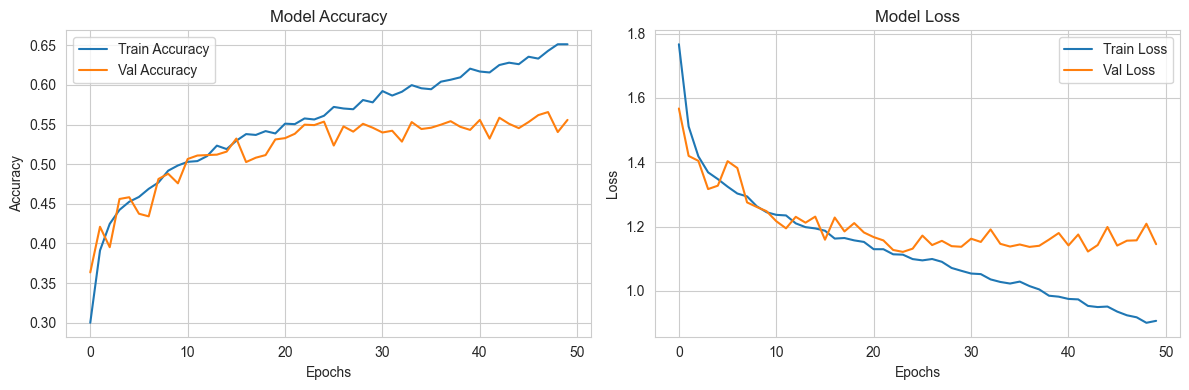

In [94]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


In [95]:
model.save("speech_emotion_detection_model.h5")
print("Model saved!")

Model saved!
